In [14]:
pip install -q tf-nightly

     |████████████████████████████████| 324.9MB 34kB/s 
     |████████████████████████████████| 460kB 36.0MB/s 
     |████████████████████████████████| 6.7MB 28.7MB/s 


In [15]:
import tensorflow as tf
import pathlib
from keras.preprocessing import image
dataset_url = "https://hoangnhi2310.github.io/giaydep2.tar"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='giaydep', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [2]:
# new
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 23 images belonging to 2 classes.


In [3]:
# new
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

NameError: ignored

In [17]:

image_count = len(list(data_dir.glob('*/*')))
print(image_count)

23


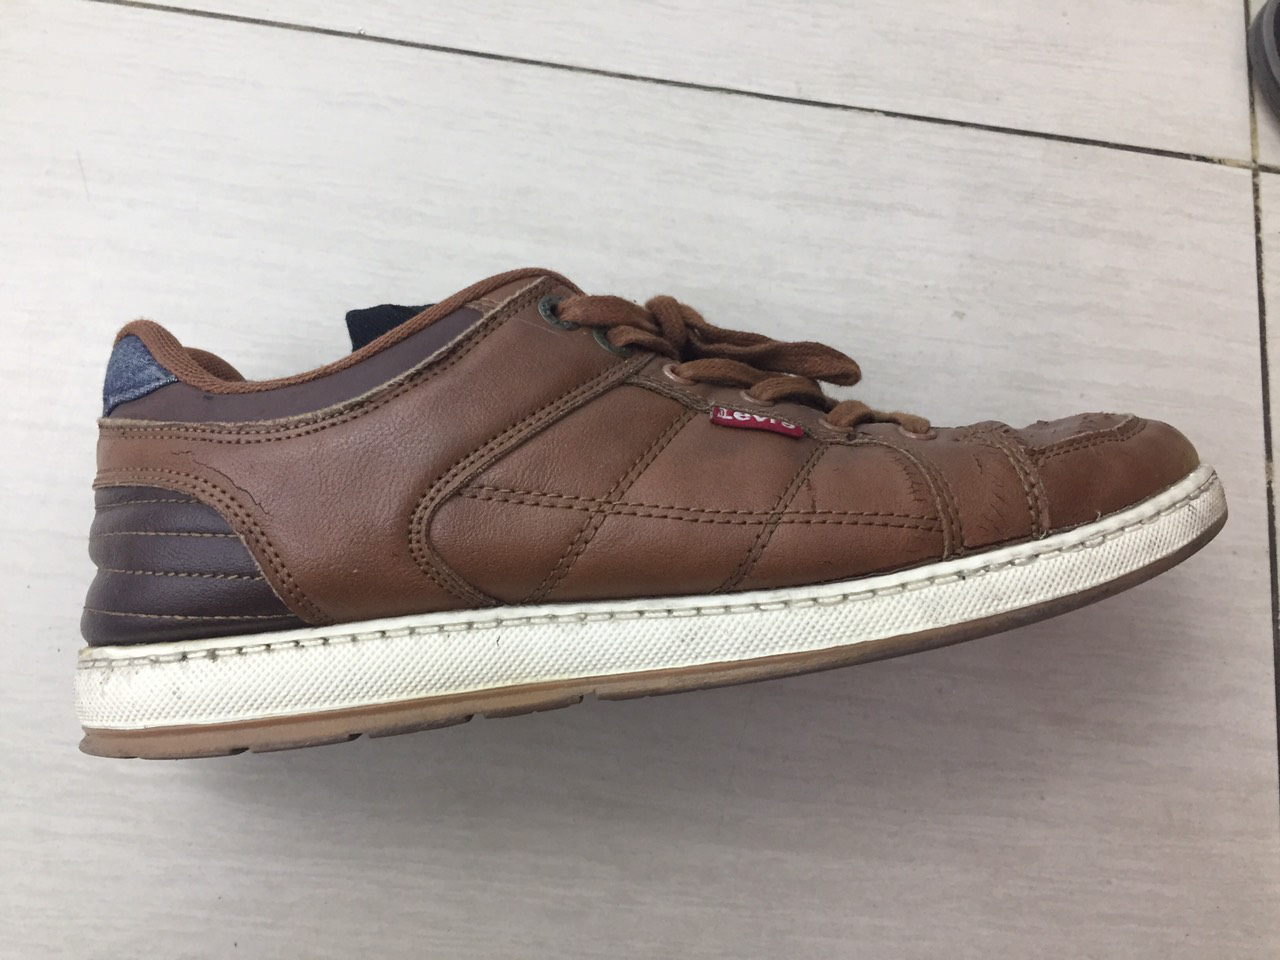

In [ ]:
giay = list(data_dir.glob('giay/*'))
import os
import PIL
import PIL.Image
import numpy as np
PIL.Image.open(str(giay[0]))

In [20]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AttributeError: ignored

In [19]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AttributeError: ignored

In [ ]:
class_names = train_ds.class_names
print(class_names)

['dep', 'giay']


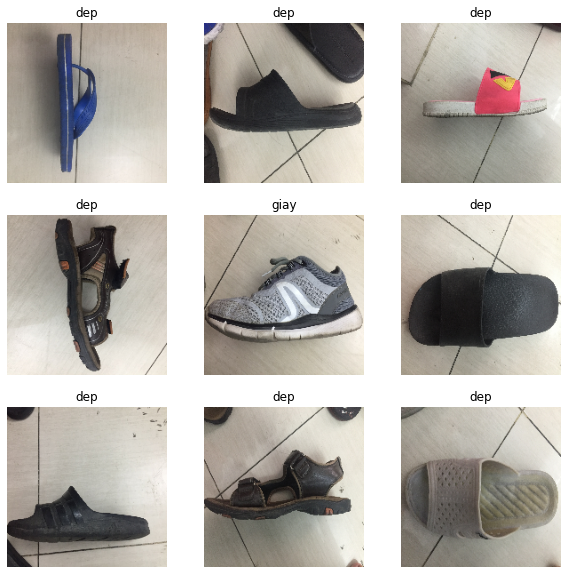

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(26, 180, 180, 3)
(26,)


In [ ]:
#import cv2
#import glob
#filenames = glob.glob(dataset_url)
#for filename in filenames:
#  image = cv2.imread(filename)
#  gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#  image = cv2.resize(image, (128, 128))
#  gray_img = cv2.resize(gray_img, (128, 128))
#  cv2.imwrite("gray_images/gray_" +str(count) +".jpg", gray_img)
#  cv2.imwrite("color_images/color_" +str(count) +".jpg", image)
#  count += 1

## **Standardize the data**

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer.

In [ ]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds =  train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.04117647 0.9702616


# Train a model

In [ ]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='softmax')
])

In [5]:
# for binary variables
from tensorflow.keras import layers
model = tf.keras.Sequential([
  layers.Conv2D(16, (3,3), activation='relu',
                input_shape=(300, 300, 3)),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid') # or 2 neurons and softmax function
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [ ]:
#model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=8,
    verbose=2
)

NameError: ignored

In [ ]:
# old
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
1/1 [==============================] - 3s 3s/step - loss: 0.6932 - accuracy: 0.4231 - val_loss: 0.7101 - val_accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 2s 2s/step - loss: 0.7098 - accuracy: 0.5769 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/3
1/1 [==============================] - 2s 2s/step - loss: 0.6932 - accuracy: 0.4231 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model.save("/content/gdrive/My Drive/saved_model/giaydep_classify4.h5")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 59168)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               7573632   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [ ]:
test_image= image.load_img(r"/content/gdrive/My Drive/test_images/IMG_6341.JPG") 
test_image = image.img_to_array(test_image)
#test_image = tf.image.rgb_to_grayscale(test_image, name=test_image)
test_image = tf.image.resize(test_image, (180,180))
#test_image = test_image / 255.0
test_image = normalization_layer(test_image)
#test_image = Image.fromarray(test_image).resize(size=(28, 28))
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)   
print(result)


[[0.49894515]]


In [ ]:
test_image= image.load_img(r"/content/gdrive/My Drive/test_images/test_giay.jpg") 
test_image = image.img_to_array(test_image)
#test_image = tf.image.rgb_to_grayscale(test_image, name=test_image)
test_image = tf.image.resize(test_image, (180,180))
test_image = test_image / 255.0
#test_image = Image.fromarray(test_image).resize(size=(28, 28))
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)   
print(result)


In [ ]:
import keras
keras.__version__